## Diabetes Challenge!  Machine Learning in Health 
#### The type of dataset and problem is a classic supervised binary classification. Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.To solve the problem we will have to analyse the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Imports and configuration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

### Load the dataset

In [2]:
dfx = pd.read_csv("diabetes.csv")

### Inspect the Dataset

In [3]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset = dfx.values
X = dataset[:  , 0: 8 ]
Y = dataset[:  , 8 ]

In [5]:
print(X.shape)
print(Y.shape)


(768, 8)
(768,)


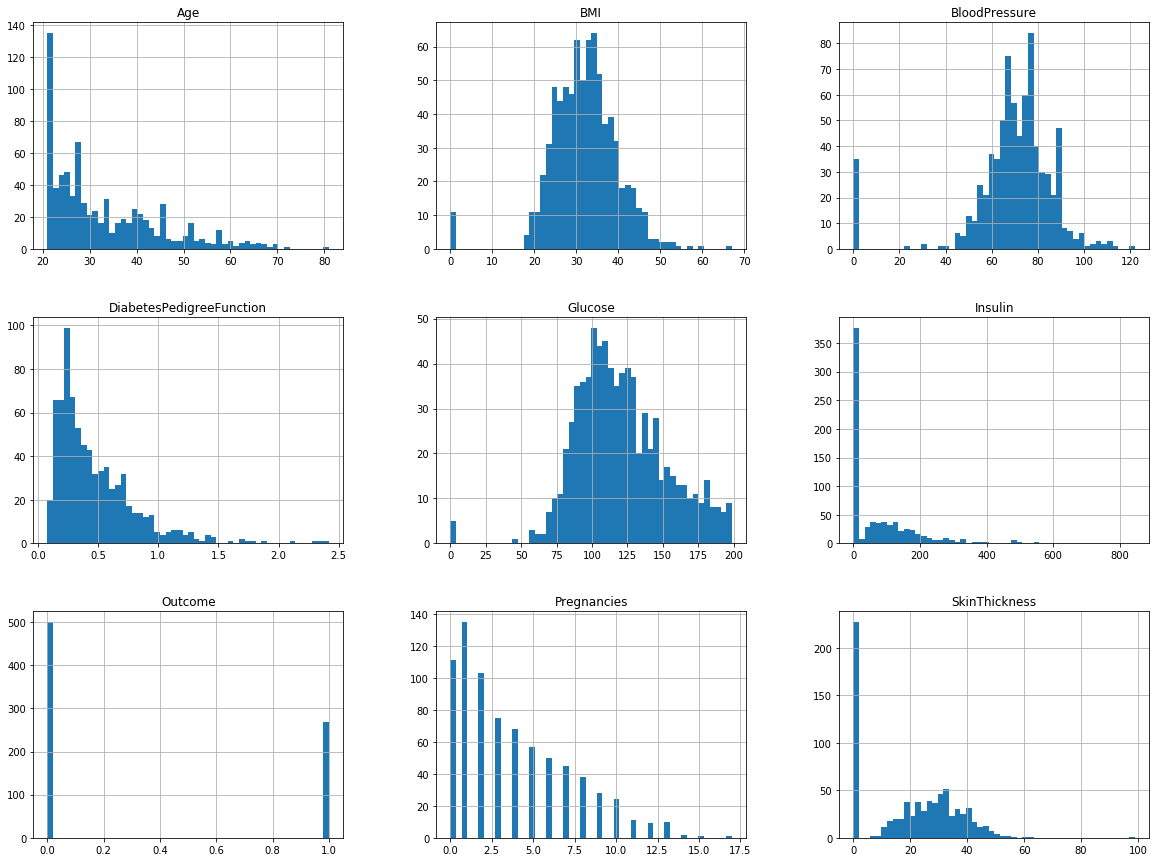

In [6]:
dfx.hist(bins=50, figsize=(20, 15))
plt.show()

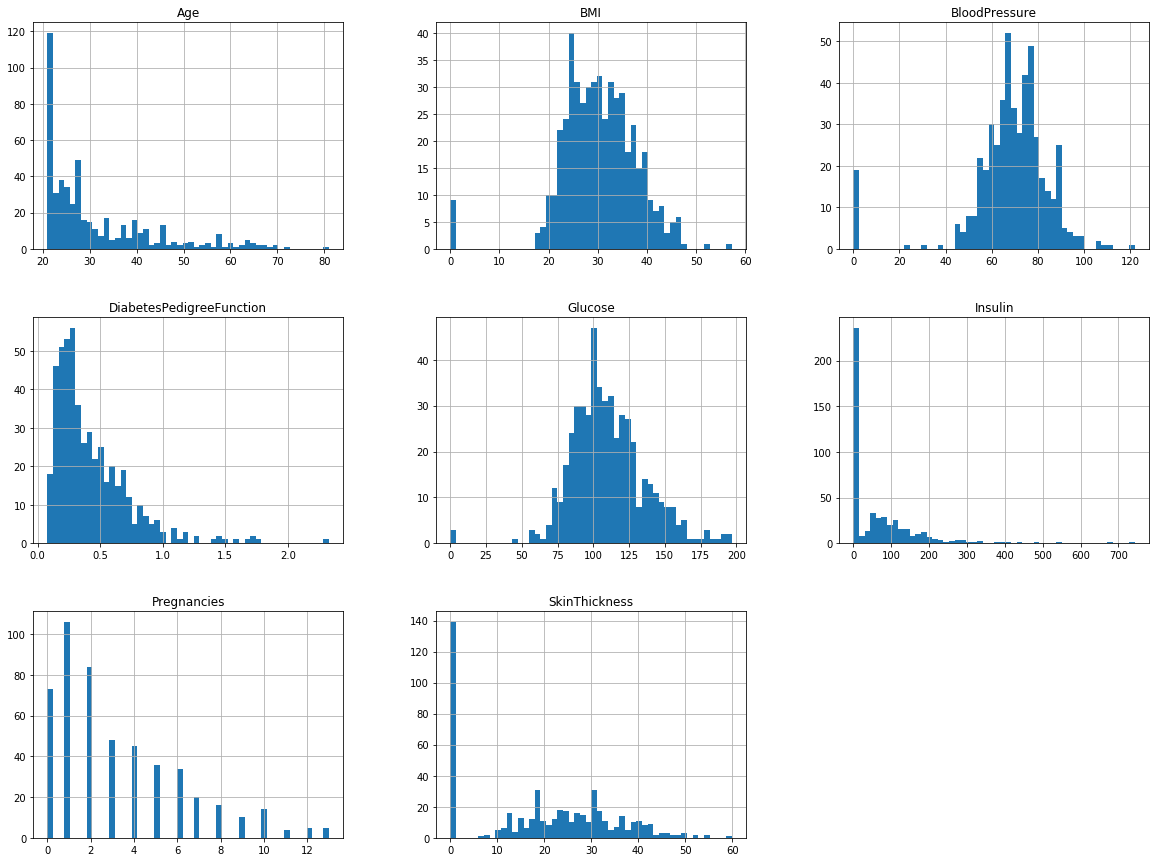

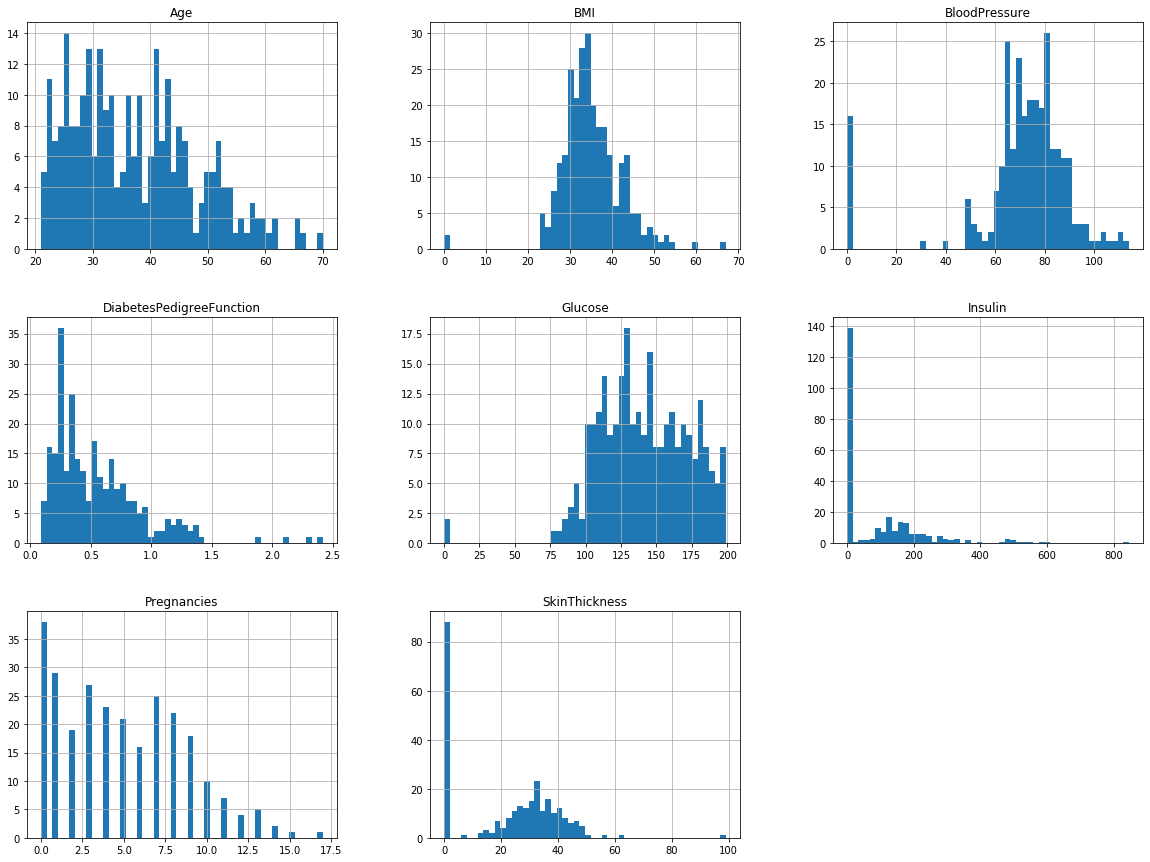

In [7]:
dfx.groupby('Outcome').hist(bins=50 , figsize=(20, 15))
plt.show()

# Scikit learn Split 

In [8]:
from sklearn.model_selection import train_test_split
XTrain , Xtest, YTrain , Ytest = train_test_split(X ,Y , test_size = .2)

In [9]:
print(XTrain.shape , YTrain.shape)
print(Xtest.shape, Ytest.shape)

(614, 8) (614,)
(154, 8) (154,)


## Supervised Learning Algo 

### Using KNN from sklearn 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [11]:
model = KNeighborsClassifier()

In [12]:
model.fit(XTrain , YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
y_predict_model = model.predict(Xtest)

In [14]:
print(y_predict_model)

[1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.]


In [15]:
def score():
    return y_predict_model==Ytest
y_predict_model_score = score()
accuracy_model = (np.unique(y_predict_model_score , return_counts=True)[1][1]/y_predict_model.shape)*100

In [16]:
print(accuracy_model[0])

70.12987012987013


### Using KNN 

In [17]:
def distance(x1 ,x2):
    return np.sqrt(sum((x1-x2)**2))
def knn(X , Y ,queryPoint  , k=25 ):
    vals = []
    m = X.shape[0]
    for i in range(m):
        dist = distance(X[i] , queryPoint)
        vals.append((dist ,Y[i]))
    vals = sorted(vals)
    vals = np.array(vals[: k])
    new_vals = np.unique(vals[ : , 1] , return_counts=True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [18]:
preds = []
m = Xtest.shape[0]
print(m)
for i in range(m):
    pred = knn(XTrain , YTrain ,Xtest[i])
    preds.append(int(pred))

154


In [19]:
y_predict = np.array(preds)

In [20]:
print(y_predict)

[1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 1 0 0]


In [21]:
def score():
    return y_predict==Ytest

In [22]:
scorearray = score()

In [23]:
print(scorearray)

[ True False  True False False  True  True  True  True False  True  True
 False False False  True  True False  True  True  True  True False  True
 False False False  True False  True  True  True  True  True  True  True
  True  True  True  True False False  True False  True  True  True  True
 False False  True  True False  True  True  True False  True  True  True
  True False  True  True  True  True False False  True False  True  True
 False  True  True  True False  True False False  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
 False  True False  True  True  True False  True  True  True False False
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True False False  True  True
 False False False  True  True  True  True False  True  True]


In [24]:
percentage = (np.unique(scorearray , return_counts=True)[1][1]/y_predict.shape)*100

In [25]:
print(percentage[0])

72.07792207792207
